## Выявление закономерностей определяющих успешность компьютерных игр для компании 2017 года

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В процессе проекта необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

**Цель проекта:** Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Отработать принцип работы с данными.

**План проекта:**
1. Изучить общую информацию о датасете
2. Подготовить данные для анализа: 
    - Заменить названия столбцов (привести к нижнему регистру)
    - Преобразовать данные в нужные типы.
    - Обработать пропуски в данных.
    - Посчитайть суммарные продажи во всех регионах.
3. Провести исследовательский анализ данных:
   - Изучить, сколько игр выпускалось в разные годы.
   - Изучить, как менялись продажи по платформам в течении времени.
   - Определить актуальный период, данные за который помогут построить прогноз на 2017 год.
   - Определить какие платформы лидируют по продажам, растут или падают? 
   - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
   - Изучить, как влияют на продажи популярных платформ отзывы пользователей и критиков.
   - Изучить, общее распределение игр по жанрам.
4. Составить портрет пользователя каждого региона(NA, EU, JP): 
   - Определить самые популярные платформы (топ-5). 
   - Определить самые популярные жанры (топ-5).
   - Определить влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверка гипотез:
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
   - Средние пользовательские рейтинги жанров Action и Sports разные.
6. Общий вывод по проекту.


## Изучение данных

<div class="alert alert-info"><b>Общая информация</b> о таблице <b>games</b> и обзор первых 5ти строк таблицы</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

#убираем scientific notation для лучшего восприятия
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data = pd.read_csv('games.csv')#('')

print('Первые 5 строк датафрейма')
display(data.head())
print(60 * '= ')

print('Общая информация: ')
data.info()
print(60 * '= ')

print('Описательная статистика:')
display(data.describe(include='all'))
print(60 * '= ')

print(f'Полных дубликатов: {data.duplicated().sum()}')
print(60 * '= ')

Первые 5 строк датафрейма


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000,16713,16715.000,16715.000,16715.000,16715.000,8137.000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.485,NaN,0.263,0.145,0.078,0.047,68.968,NaN,NaN
std,NaN,NaN,5.877,NaN,0.814,0.503,0.309,0.187,13.938,NaN,NaN
min,NaN,NaN,1980.000,NaN,0.000,0.000,0.000,0.000,13.000,NaN,NaN
25%,NaN,NaN,2003.000,NaN,0.000,0.000,0.000,0.000,60.000,NaN,NaN
50%,NaN,NaN,2007.000,NaN,0.080,0.020,0.000,0.010,71.000,NaN,NaN
75%,NaN,NaN,2010.000,NaN,0.240,0.110,0.040,0.030,79.000,NaN,NaN


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


<div class="alert alert-info">Проверим дубликаты по столбцам<b> "Name","Platform","Year_of_Release"</b></div>

In [2]:
print(f'Полных дубликатов: {data[["Name","Platform","Year_of_Release"]].duplicated().sum()}')
print(60 * '= ')
display(data[data[["Name","Platform","Year_of_Release"]].duplicated()].head())

Полных дубликатов: 2
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.000,Sports,0.000,0.010,0.000,0.000,83.000,5.5,E


**Вывод:**

- 16,7 тыс. строк.
- Полных дубликатов нет.
- Есть пропуски данных в столбцах : Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Подробнее рассмотрим ниже.
- Необходимо заменить типы данных в столбцах: year_of_release и user_score.
- Необходимо привести названия столбцов к нижнему регистру.
- Минимальные и максимальные значения в столбцах Year_of_Release, Critic_Score адекватные. Выбросов нет.
- Видим огромныю разницу между медианами и максимальными вначениями в столбцах na_sales, eu_sales, jp_sales и other_sales.

## Подготовка данных




Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

<div class="alert alert-info"><b>Заменяем названия столбцов</b> (приводим к нижнему регистру)</div>

In [3]:
data.columns = data.columns.str.lower()

print('Первые 5 строк датафрейма')
display(data.head(10))

Первые 5 строк датафрейма


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,2006.000,Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.000,Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,NaN,NaN,NaN


<div class="alert alert-info"><b>Преобразование данных в нужные типы</b> </div>

- year_of_release - заменить тип float64 на Int64 , так как для datetime64, нет достаточной информации.
- user_score - заменить тип object на float64, так как это числовой рейтинг.

Остальные типы столбцов соответствуют наполнению

<div class="alert alert-info">Преобразование данных в столбцах <b>year_of_release</b> в Int64 </div>

In [4]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

<div class="alert alert-info">Рассмотрим подробнее столбец <b>user_score</b></div>

In [5]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**TBD** обычно означает «Подлежит определению». Создатели фильма либо еще не получили оценку от рейтинговой доски, либо получили оценку, которая им не понравилась, и они работают над редактированием фильма, чтобы получить желаемую оценку. 

**Преобразуем 'tbd' в NaN** для того, чтобы перевести столбец в **float64**

<div class="alert alert-info">В столбце <b>user_score преобразуем 'tbd' в NaN</b> и переводим весь столбец в тип данных 'float64'</div>

In [6]:
data = data.replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float64')
data['user_score'].value_counts(dropna=False)

NaN      9125
7.800     324
8.000     290
8.200     282
8.300     254
         ... 
1.000       2
1.500       2
9.600       2
0.000       1
9.700       1
Name: user_score, Length: 96, dtype: int64

<div class="alert alert-info"><b>Типы данных после преобразования</b> </div>

In [7]:
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

<div class="alert alert-info"><b>Обработка пропусков</b> </div>

In [8]:
print('Количество пропусков в столбцах')
display(data.isna().sum())

Количество пропусков в столбцах


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

- **name** и **genre** - Рассмотрим подробнее строки и удалим их в связи с отсутствием полезной информации. 
- **year_of_release**, **critic_score** и **user_score** - Пропуски не будем ничем заполнять, так как корректно заполнить их нечем. Заполнять медианой или средним - будет не верно. Удалять строки, так же не будем, что бы не терять данные.
- **rating** -  рассмотрим подробнее и заменим пропуски на "PR" - это символ который используется в рекламных материалах для игр, которым еще не присвоен окончательный рейтинг ESRB.

<div class="alert alert-info">Рассмотрим подробнее пропуске в столбце <b>name</b> </div>

In [9]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN


- Тут же нашли 2 пропуска из столбца genre. 
- В строках практически нет полезной информации к тому же главное нет имени игры. **Поэтому удаляем эти 2 строки**

In [10]:
data = data.dropna(subset = ['name'])

<div class="alert alert-info">Рассмотрим подробнее распределение пропусков в столбцах <b>critic_score</b> и <b>user_score</b> по годам</div>

In [11]:
pd.set_option('display.max_columns', None)
print('Распределение доли NaN от общего числа записей из critic_score по годам')
data[data['critic_score'].isnull()].groupby('year_of_release')['name'].count()/data.groupby('year_of_release')['name'].count()

Распределение доли NaN от общего числа записей из critic_score по годам


year_of_release
1980   1.000
1981   1.000
1982   1.000
1983   1.000
1984   1.000
1985   0.929
1986   1.000
1987   1.000
1988   0.933
1989   1.000
1990   1.000
1991   1.000
1992   0.977
1993   1.000
1994   0.992
1995   1.000
1996   0.970
1997   0.941
1998   0.926
1999   0.885
2000   0.591
2001   0.324
2002   0.244
2003   0.245
2004   0.264
2005   0.302
2006   0.384
2007   0.422
2008   0.499
2009   0.543
2010   0.602
2011   0.560
2012   0.508
2013   0.498
2014   0.551
2015   0.629
2016   0.538
Name: name, dtype: float64

In [12]:
print('Распределение доли NaN от общего числа записей из user_score по годам')

data[data['user_score'].isnull()].groupby('year_of_release')['name'].count()/data.groupby('year_of_release')['name'].count()

Распределение доли NaN от общего числа записей из user_score по годам


year_of_release
1980   1.000
1981   1.000
1982   1.000
1983   1.000
1984   1.000
1985   0.929
1986   1.000
1987   1.000
1988   0.933
1989   1.000
1990   1.000
1991   1.000
1992   0.977
1993   1.000
1994   0.992
1995   1.000
1996   0.970
1997   0.938
1998   0.918
1999   0.908
2000   0.694
2001   0.467
2002   0.440
2003   0.334
2004   0.358
2005   0.379
2006   0.451
2007   0.475
2008   0.537
2009   0.569
2010   0.628
2011   0.559
2012   0.481
2013   0.441
2014   0.434
2015   0.510
2016   0.478
Name: name, dtype: float64

До 1999 года пропуски в столбцах critic_score и user_score состовляют почти 100%. Вероятно тогда еще не было как таковых общих оценок критиков и пользователей, которые бы могли попасть в таблицу. С 2000 по 2016 года пропуски составляются от 30 до 60%.

<div class="alert alert-info">Рассмотрим подробнее пропуске в столбце <b>rating </b> </div>

In [13]:
data['rating'].value_counts(dropna=False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

**Расшифрофка рейтингов:**
- Е - Игры с таким рейтингом содержат контент, который считается подходящим для всех возрастов.
- T - Игры с таким рейтингом содержат контент, который считается подходящим для лиц в возрасте 13 лет и старше.
- M - Игры с таким рейтингом содержат контент, который считается подходящим для лиц в возрасте 17 лет и старше. 
- E10+ - Игры с таким рейтингом содержат контент, который считается подходящим для лиц в возрасте 10 лет и старше. 
- EC - Игры с таким рейтингом содержат контент, предназначенный для детей дошкольного возраста.
- K-A - ?
- RP - символ который используется в рекламных материалах для игр, которым еще не присвоен окончательный рейтинг ESRB.
- AO - Игры с таким рейтингом содержат контент, который считается подходящим только для взрослых.

**Заменим все пропуски на "RP"**, так как :
**RP** - символ который используется в рекламных материалах для игр, которым еще не присвоен окончательный рейтинг ESRB.

In [14]:
data['rating']= data['rating'].fillna('RP')
data['rating'].value_counts(dropna=False)

RP      6767
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

<div class="alert alert-info"> <b>Пропуски после заполнения</b> </div>

In [15]:
print('Количество пропусков в столбцах')
display(data.isna().sum())

Количество пропусков в столбцах


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

<div class="alert alert-info"> Посмотрим диаграммы размаха столбцов <b>na_sales, eu_sales, jp_sales и other_sales </b> </div>

Диаграмма размаха столбца na_sales. Медиана - 0.08 млн. Максимальное - 41.36 млн.


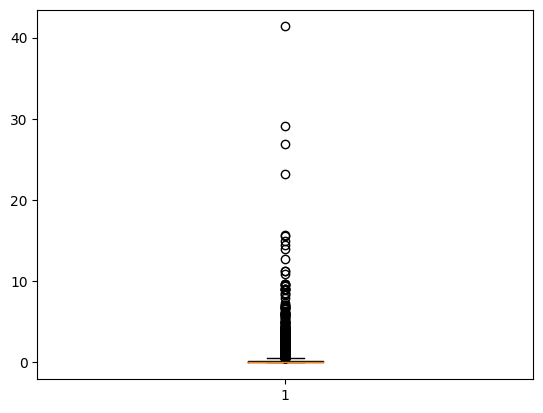

Диаграмма размаха столбца eu_sales. Медиана - 0.02 млн. Максимальное - 28.96 млн.


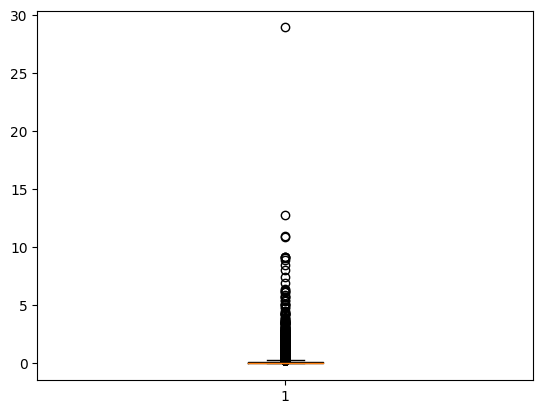

Диаграмма размаха столбца jp_sales. Медиана - 0.0 млн. Максимальное - 10.22 млн.


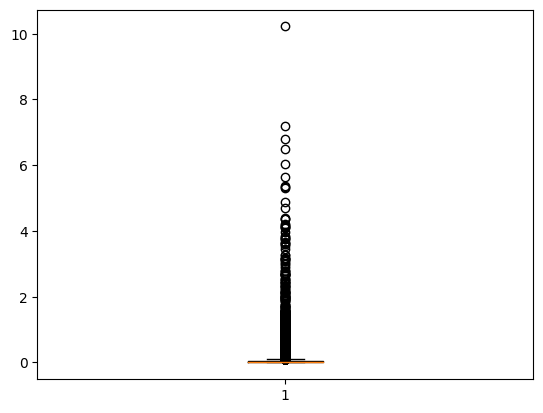

Диаграмма размаха столбца other_sales. Медиана - 0.01 млн. Максимальное - 10.57 млн.


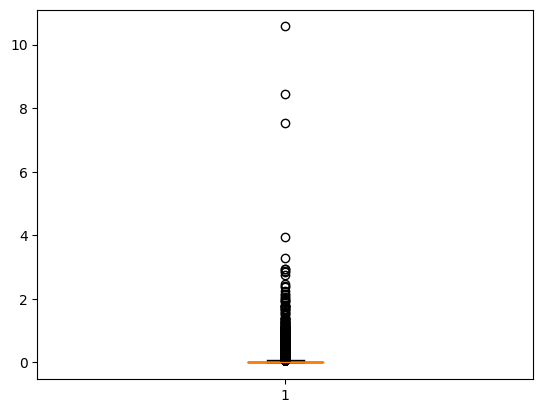

In [16]:
print(f'Диаграмма размаха столбца na_sales. Медиана - {data["na_sales"].median()} млн. Максимальное - {data["na_sales"].max()} млн.')
plt.boxplot(data['na_sales'])
plt.show()

print(f'Диаграмма размаха столбца eu_sales. Медиана - {data["eu_sales"].median()} млн. Максимальное - {data["eu_sales"].max()} млн.')
plt.boxplot(data['eu_sales'])
plt.show()

print(f'Диаграмма размаха столбца jp_sales. Медиана - {data["jp_sales"].median()} млн. Максимальное - {data["jp_sales"].max()} млн.')
plt.boxplot(data['jp_sales'])
plt.show()

print(f'Диаграмма размаха столбца other_sales. Медиана - {data["other_sales"].median()} млн. Максимальное - {data["other_sales"].max()} млн.')
plt.boxplot(data['other_sales'])
plt.show()

- Столбец na_sales. Медиана - 0.08 млн. Максимальное - 41.36 млн.
- Столбец eu_sales. Медиана - 0.02 млн. Максимальное - 28.96 млн.
- Столбец jp_sales. Медиана - 0.0 млн. Максимальное - 10.22 млн.
- Столбец other_sales. Медиана - 0.01 млн. Максимальное - 10.57 млн.

**Вывод:**
    Обратим внимание, на то, что есть очень выбивающиеся значения. Ничего делать с ними пока не будем.

<div class="alert alert-info"> Считаем суммарные продажи во всех регионах и добавляем их в столбец <b>all_sales</b> </div>

In [17]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,NaN,NaN,RP,40.240
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,RP,31.380


## Исследовательский анализ данных

<div class="alert alert-info"> Смотрим, сколько игр выпускалось в разные годы <b></b> </div>

<AxesSubplot:xlabel='year_of_release'>

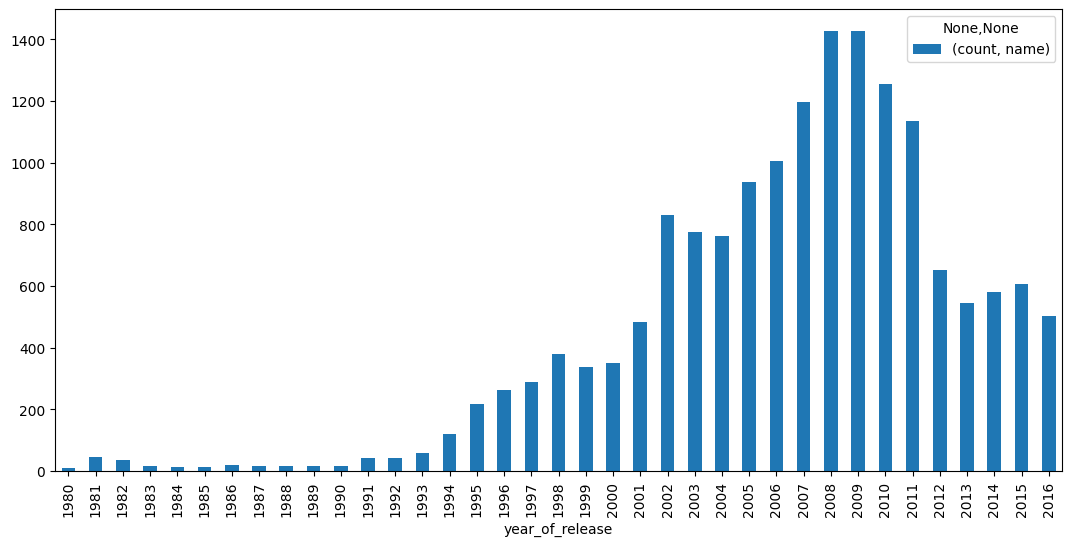

In [18]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc=['count']).plot(kind='bar', figsize=(13, 6))

**Сильный рост количества выпускаемых игр начался после 2000 года.**

<div class="alert alert-info"> Выбераем платформы с наибольшими суммарными продажами<b></b> </div>

In [19]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

<div class="alert alert-info"> Распределение продаж игр на определенные платформы по годам.<b></b> </div>

<AxesSubplot:xlabel='year_of_release'>

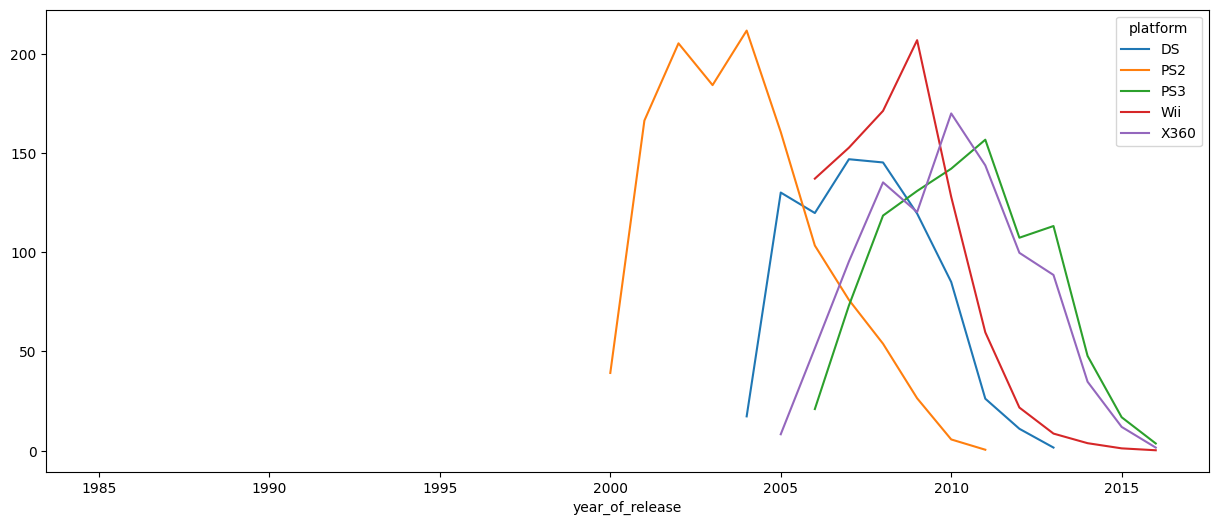

In [45]:
popular_platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360']

data_demo = data[data['platform'].isin(popular_platforms)].groupby(['year_of_release','platform']).agg(sum=('all_sales','sum')).unstack('platform')
data_demo.columns = data_demo.columns.droplevel(0)
data_demo.plot(figsize=(15,6))

Рассматриваем период с 2000го года так, как в этот период как раз попадает наши ТОП 5 платформ. К тому же количество вышедших игр явно ростет именно с 2000 года.

Выводы:
Судя по графику сроки жизни популярных платформ:
- PS2 - 2002 - 2011 - **9лет**
- DS - 2004 - 2013 - **9 лет**
- PS3 - 2006 - 2016 - **10 лет**
- Wii - 2006 - 2016 - **10 лет**
- X360 - 2005 - 2016 - **11 лет**

**В среднем срок жизни популярных платформ судя по данным - около 10 лет.** 

*Но так же помним, что данные за 2016 год могут быть неполными и продажи PS3, Wii и X360 могут продолжаться и в 2017ом году

<div class="alert alert-info"> Посмотрим сроки жизни в годах на всех платформах из представленного датасета<b></b> </div>

In [22]:
data.groupby('platform')['year_of_release'].nunique()

platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
Name: year_of_release, dtype: int64

<div class="alert alert-info"> <b>Средний срок жизни игровых платформ выпущенных с 1980 до 2016 годы - 7,6 лет </b> </div>

In [23]:
data.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

<div class="alert alert-info"> <b>Для дальнейшего анализа возьмем период с 2012 года.</b> Так как это достаточный перод для анализа и с 2012го года есть определенная тенденция к спаду продаж, которая вероятно продолжится и в 2017ом году  </div>

<div class="alert alert-info"> <b></b>  Рассмотрим, как распределяются сумарные продажи игр для определенных платформ начиная с 2012 года на диаграмме </div>

<AxesSubplot:xlabel='Платформа', ylabel='Cумма продаж в млн.'>

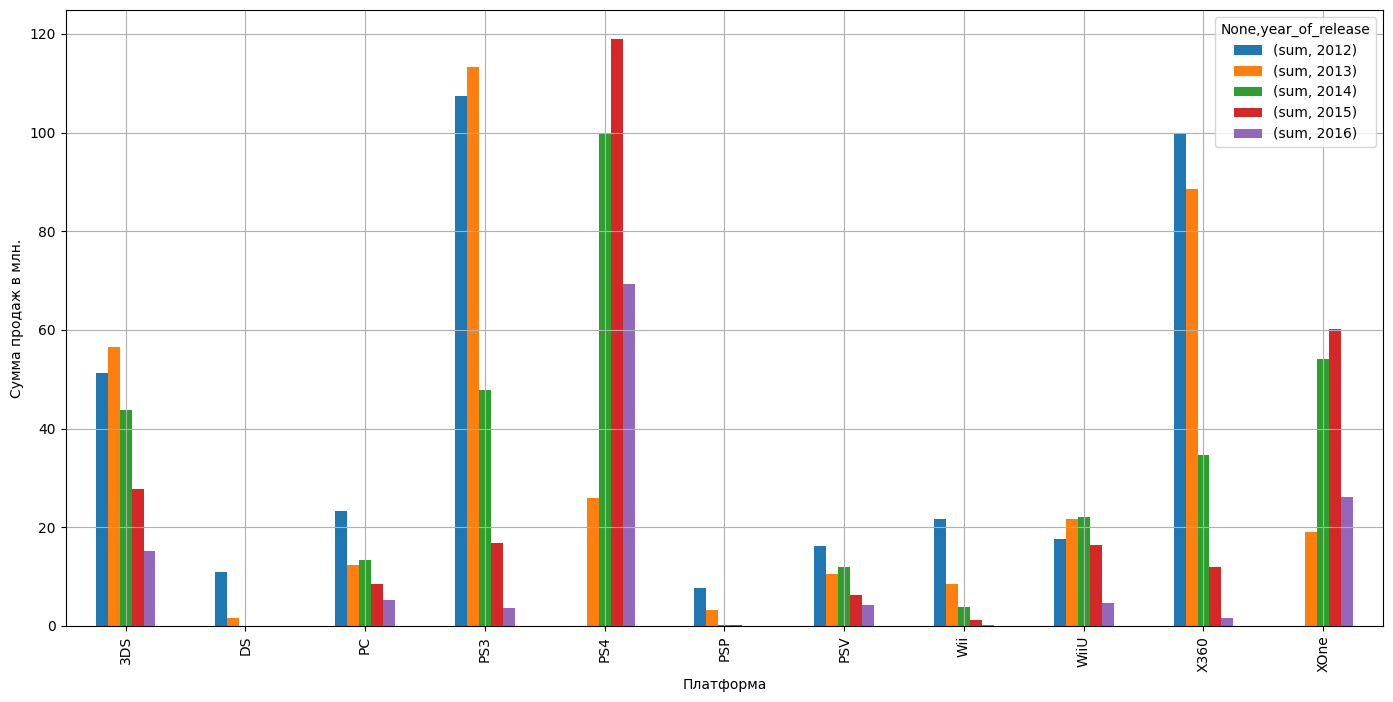

In [24]:
data_from_2012 = data[data['year_of_release'] >= 2012]
data_from_2012.pivot_table(index ='platform', columns = 'year_of_release', values = 'all_sales', aggfunc=['sum']).plot(
    kind='bar',
    xlabel='Платформа',
    ylabel='Cумма продаж в млн.',
    label=i, 
    legend=True,
    grid=True,
    figsize=(17, 8))

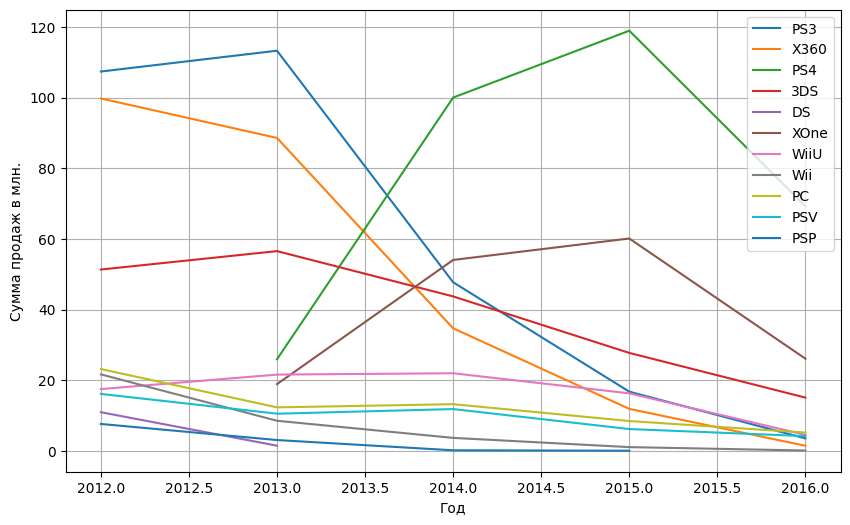

In [25]:
popular_platforms = data_from_2012['platform'].unique()
for i in popular_platforms :
    data_from_2012.query('platform == @i').groupby('year_of_release')['all_sales'].sum().plot(
        xlabel='Год',
        ylabel='Cумма продаж в млн.',
        label=i, 
        legend=True,
        grid=True,
        figsize=(10, 6)
    )

<div class="alert alert-info"> <b></b> <div class="alert alert-info"> <b></b> Рассмотрим, как распределяются сумарные продажи игр для определенных платформ начиная с 2012 года в таблице </div></div>

In [26]:
data_from_2012.pivot_table(index ='platform', columns = 'year_of_release', values = 'all_sales', aggfunc=['sum'])

sum                               
year_of_release    2012    2013    2014    2015   2016
platform                                              
3DS              51.360  56.570  43.760  27.780 15.140
DS               11.010   1.540     NaN     NaN    NaN
PC               23.220  12.380  13.280   8.520  5.250
PS3             107.360 113.250  47.760  16.820  3.600
PS4                 NaN  25.990 100.000 118.900 69.250
PSP               7.690   3.140   0.240   0.120    NaN
PSV              16.190  10.590  11.900   6.250  4.250
Wii              21.710   8.590   3.750   1.140  0.180
WiiU             17.560  21.650  22.030  16.350  4.600
X360             99.740  88.580  34.740  11.960  1.520
XOne                NaN  18.960  54.070  60.140 26.150

<div class="alert alert-info"> <b></b> Рассмотрим, сколько игр было выпущено для определенных платформ с 2012 по 2016 годы</div>

In [27]:
print('Количество выпущенных игр на платформах с 2012 по 2016 год')

data_from_2012.pivot_table(index ='platform', columns = 'year_of_release', values = 'name', aggfunc=['count'])

Количество выпущенных игр на платформах с 2012 по 2016 год


count                                
year_of_release    2012    2013    2014    2015    2016
platform                                               
3DS              93.000  91.000  80.000  86.000  46.000
DS               23.000   8.000     NaN     NaN     NaN
PC               61.000  38.000  47.000  50.000  54.000
PS3             148.000 126.000 108.000  73.000  38.000
PS4                 NaN  16.000  75.000 137.000 164.000
PSP             106.000  54.000  10.000   3.000     NaN
PSV              53.000  63.000 100.000 110.000  85.000
Wii              31.000  12.000   6.000   4.000   1.000
WiiU             32.000  42.000  31.000  28.000  14.000
X360            106.000  75.000  63.000  35.000  13.000
XOne                NaN  19.000  61.000  80.000  87.000

**Вывод:**
- Платформы DS, PSP и Wii ушли или практически ушли с рынка.
- Платформа , X360 - имеет небольшую, но значительную долю рынка (13 игр и продажи на сумму от 1,5 за 2016ый год), но **продажи сильно падают.**
- Платформы 3DS, PS3, PS, PSV, WiiU - имеют большую долю рынка (от 14 до 85 игр и продажи на сумму от 3,6 до 15млн за 2016ый год), **но продажи падают.**
- **Платформы PS4(164 игр за 2016 и почти 70млн) и XOne(87 игр за 2016 и 26млн) имеют огромную долю рынка и набинают обороты.**

**Помним, что информация за 2016год неполная!**

<div class="alert alert-info"> <b>«Ящик с усами» по глобальным продажам игр в разбивке по платформам.</b> Для дальнейшего анализа уберем из датасета информацию о платформах "Wii", "DS", "PSP", так как они уже не актуальны, а также  "X360" , так как доля рынка небольшая и продажи падают.</div>

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

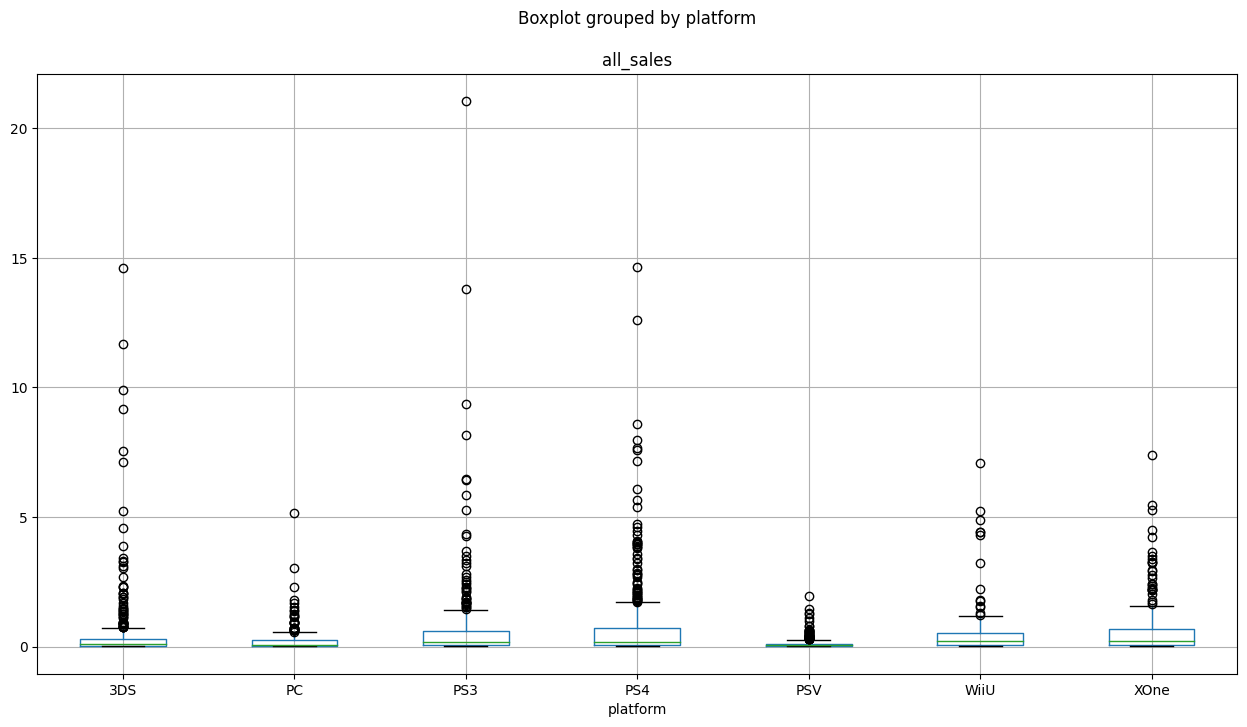

In [28]:
data_top = data_from_2012.query('platform not in ["Wii", "DS", "PSP", "X360"]')
data_top.boxplot('all_sales', by = 'platform', figsize = (15,8))

<div class="alert alert-info">Видим большой разброс данных. Для более подробного анализа <b>посмотрим значения до 1,5 млн</b></div>

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

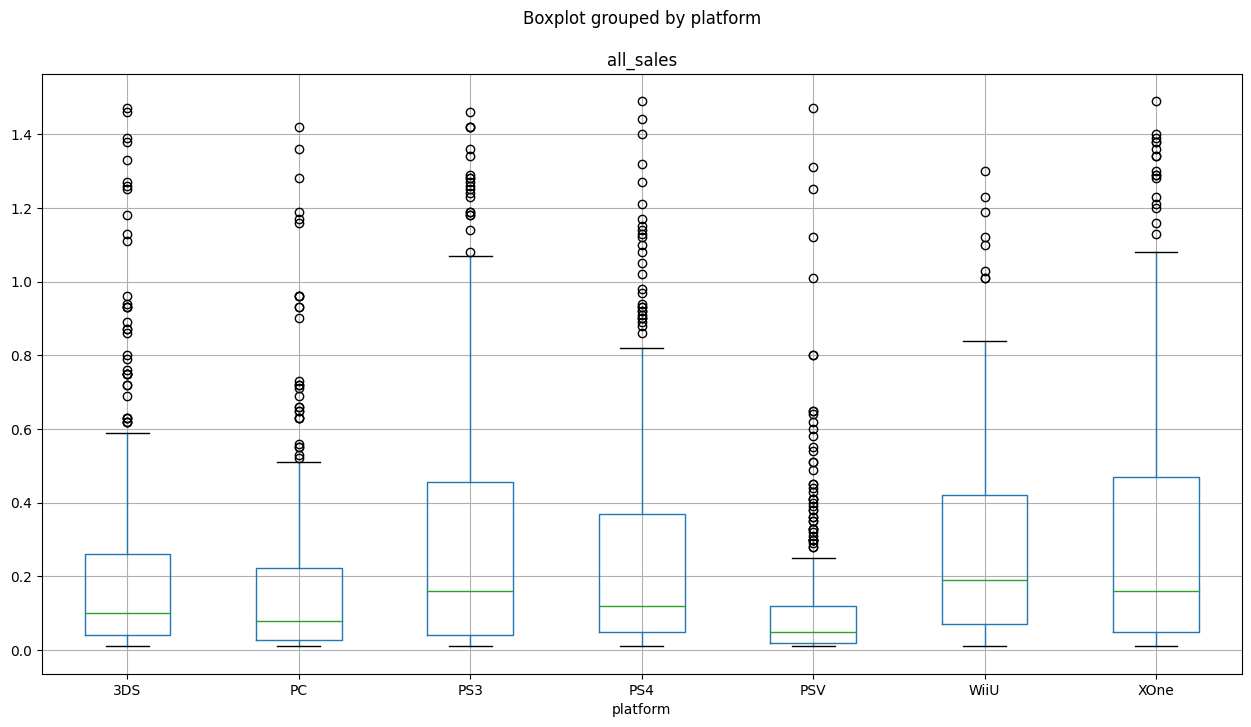

In [46]:
data_top = data_from_2012.query('platform not in ["Wii", "DS", "PSP", "X360"]')
data_top.query('all_sales < 1.5').boxplot('all_sales', by = 'platform', figsize = (15,8))

**Вывод:** 

На платформах PS3, WiiU и XOne самые высокие показатели сумарных продаж игр. Далее следует PS4. 
Но мы помним, что это анализ за 2012-2016 год. К 2016му году PS4 только набирает обороты, а тот же PS3 уже завершает свой жизненный цикл.

<div class="alert alert-info">Смотрим, <b>как влияют на продажи ирг отзывы пользователей и критиков</b> на примере популярной платформы XOne. </div>

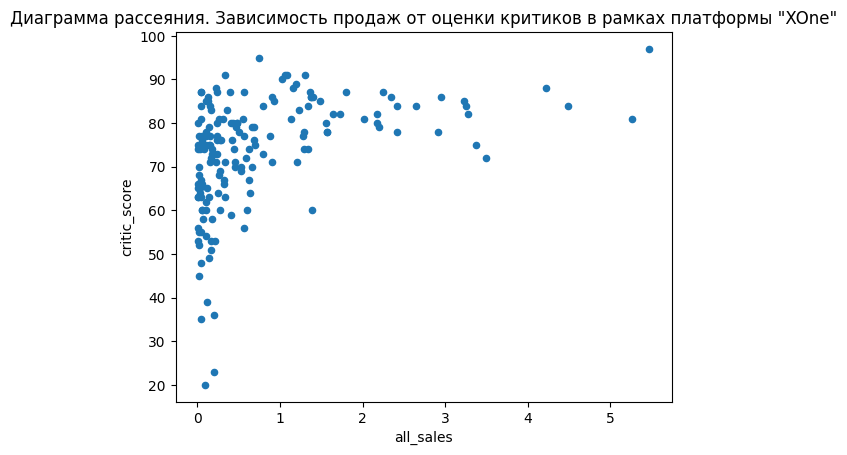

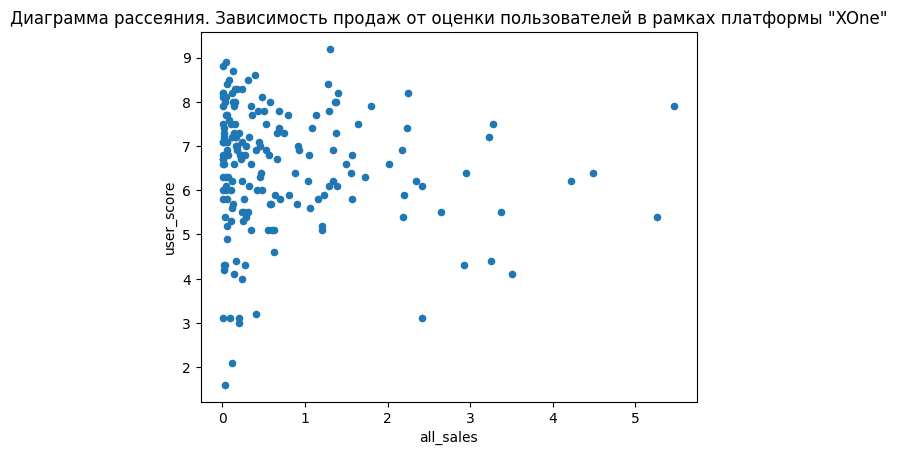

In [31]:
ax = data_top.query('platform == "XOne"').plot(kind='scatter', x ='all_sales', y ='critic_score')

ax.set_title('Диаграмма рассеяния. Зависимость продаж от оценки критиков в рамках платформы "XOne"')
ax.set_xlabel('all_sales')
ax.set_ylabel('critic_score')

plt.show()

ax = data_top.query('platform == "XOne"').plot(kind='scatter', x ='all_sales', y ='user_score')

ax.set_title('Диаграмма рассеяния. Зависимость продаж от оценки пользователей в рамках платформы "XOne"')
ax.set_xlabel('all_sales')
ax.set_ylabel('user_score')

plt.show()

<div class="alert alert-info">Считаем <b>корреляцию суммарных продажи ирг и оценок пользователей и критиков</b> на примере популярной платформы XOne. </div>

In [32]:
print('Корреляция all_sales и critic_score на примере платформы "XOne"')
print(data_top.query('platform == "XOne"')['all_sales'].corr(data_top.query('platform == "XOne"')['critic_score']).round(3))
print(60*'= ')
print('Корреляция all_sales и user_score на примере платформы "XOne"')
print(data_top.query('platform == "XOne"')['all_sales'].corr(data_top.query('platform == "XOne"')['user_score']).round(3))

Корреляция all_sales и critic_score на примере платформы "XOne"
0.417
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Корреляция all_sales и user_score на примере платформы "XOne"
-0.069


**Вывод:**
- Есть достаточно высокая линейная зависимость продаж от оценки критиков.
- Между оценкой пользователей и суммой продаж игры - линейной зависимости не найдено.

<div class="alert alert-info"> Проверяем, <b>есть ли такая же зависимость продаж от оценок на других платформах</b> </div>

In [33]:
print('Корреляция all_sales и critic_score на всех ТОП платформах')
print(data_top['all_sales'].corr(data_top['critic_score']).round(3))
print('Корреляция all_sales и user_score на всех ТОП платформах')
print(data_top['all_sales'].corr(data_top['user_score']).round(3))

Корреляция all_sales и critic_score на всех ТОП платформах
0.305
Корреляция all_sales и user_score на всех ТОП платформах
0.009


<div class="alert alert-info"> Посчитаем корреляцию продаж от оценки критиках для каждой платформы </div>

In [34]:
data_top.groupby('platform')[['critic_score','user_score']].corrwith(data_top['all_sales'])

,critic_score,user_score
platform,,
3DS,0.321,0.198
PC,0.237,-0.122
PS3,0.331,-0.005
PS4,0.407,-0.032
PSV,0.094,-0.004
WiiU,0.348,0.400
XOne,0.417,-0.069


**Вывод:**
- На платформах PS4, XOne, WiiU, PS3 и 3DS корреляция продаж и оценки критиков и пользователей выше, чем у остальных (от 0.3 до 0.4) .
- На всех ТОП платформах линейная зависимость продаж и оценки критиков немного ниже, но всё равно сохраняется. Между оценкой пользователей и суммой продаж игры - линейной зависимости так же не найдено.

<div class="alert alert-info"><b>Общее распределение игр по жанрам </b></div>

In [36]:
data_top.pivot_table(index='genre', values ='all_sales', aggfunc=(['sum','count','mean','median',])).droplevel(level=1, axis=1).sort_values(by ='mean', ascending = False)

,sum,count,mean,median
genre,,,,
Shooter,232.030,186,1.247,0.435
Platform,55.920,75,0.746,0.240
Sports,141.050,205,0.688,0.240
Role-Playing,170.050,323,0.526,0.150
Simulation,33.100,68,0.487,0.115
Racing,45.080,93,0.485,0.130
Fighting,39.160,89,0.440,0.130
Action,343.190,830,0.413,0.120
Misc,51.460,151,0.341,0.110


**Выводы:**

**В ТОП 4 жанров по сумме продаж входят :**
- Shooter - продажи на сумму: 232 млн. Количество игр: 186. **Среднее 1,2 млн** - намного выше **медианы 0,4 млн** , что говорит о том, что некоторые игры сильно высреливают по продажам по сравнению с большинством.
- Platform - продажи на сумму: 55,9 млн. Количество игр: 75. **Среднее 0,7 млн** и **медиана 0,24 млн**.
- Sports - продажи на сумму: 141 млн. Количество игр: 205. **Среднее 0,6 млн** и **медиана 0,24 млн**.
- Role-Playing - продажи на сумму: 170 млн. Количество игр: 323. **Среднее 0,5 млн** и **медиана 0,15 млн**.

*Жанр Action не дорогой, но игр выпускается огромное количество - 830. На сумму 343 млн! Среднее 0,4 и медиана 0,12*
        
*Жанры Adventure и Misc не высокие по суммам продаж, но их много по количеству. Это говорит о том, что игр выпускается много, но они недорогие.*

## Портрет пользователя каждого региона

<div class="alert alert-info">Определяем для пользователя каждого региона (NA, EU, JP) <b>самые популярные платформы (топ-5)</b> </div>

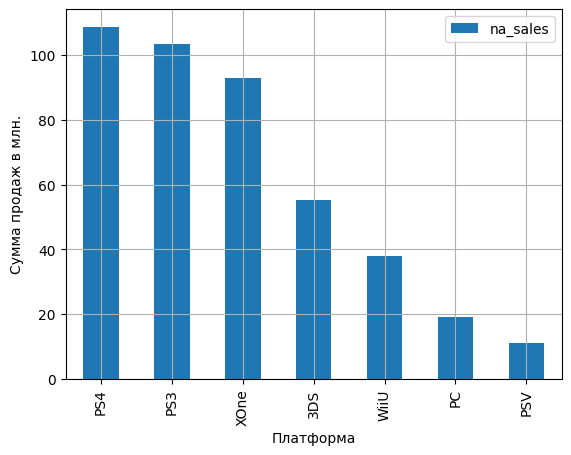

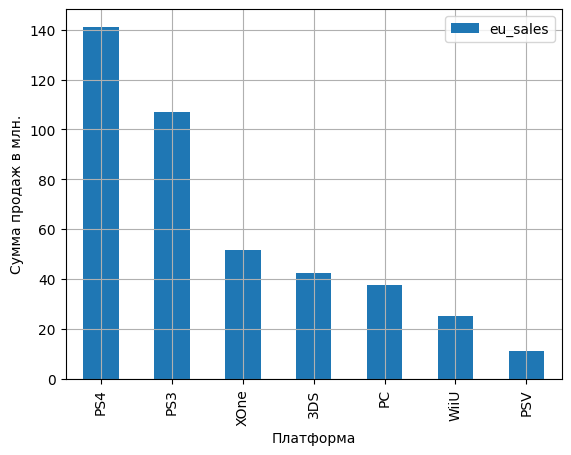

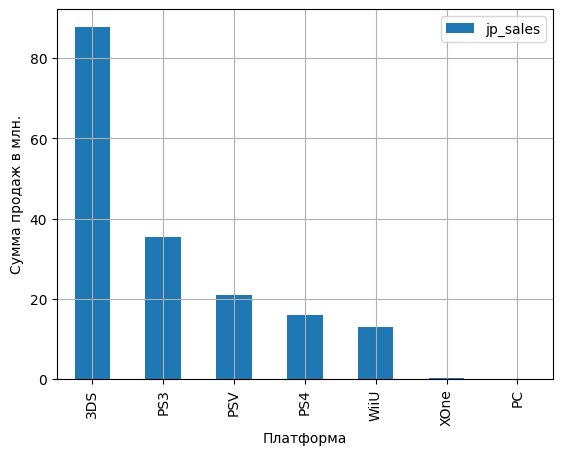

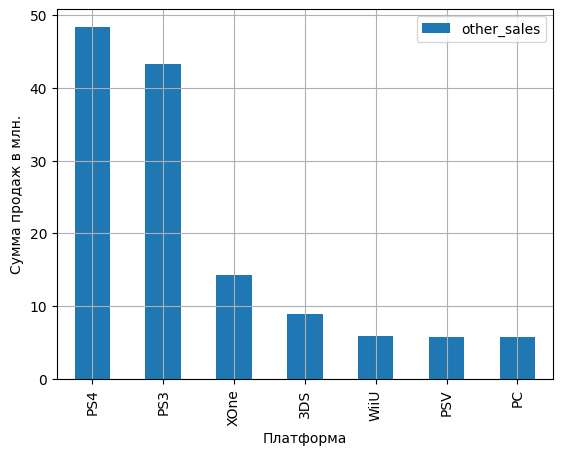

In [37]:
county_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for i in county_sales :
    data_top.pivot_table(index='platform', values=i, aggfunc='sum').sort_values(by=i, ascending=False).plot(
    kind='bar',
    xlabel='Платформа',
    ylabel='Cумма продаж в млн.',
    label=i, 
    legend=True,
    grid=True)

**Выводы:**

- в Америке топ платформ: PS4, PS3, XOne, 3DS и WiiU  
- В Европе похожая картина: PS4, PS3, XOne, 3DS и PS
- В Японии другая картина : 3DS, PS3, PSV, PS4 и WiiU  
- В остальных странах тенденция такая же как и Америке и Европе.

<div class="alert alert-info">Смотрим сколько млн тратит каждый регион (NA, EU, JP) на игры на определенных платформах<b></b> </div>

In [38]:
na_sales = data_top.pivot_table(index='platform', values = 'na_sales', aggfunc='sum')
eu_sales = data_top.pivot_table(index='platform', values = 'eu_sales', aggfunc='sum')
jp_sales = data_top.pivot_table(index='platform', values = 'jp_sales', aggfunc='sum')
other_sales = data_top.pivot_table(index='platform', values = 'other_sales', aggfunc='sum')

all_sales_pivot = na_sales.merge(eu_sales, on='platform', how='outer') 
all_sales_pivot = all_sales_pivot.merge(jp_sales, on='platform', how='outer')
all_sales_pivot = all_sales_pivot.merge(other_sales, on='platform', how='outer')


display(all_sales_pivot)

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,55.310,42.640,87.790,8.870
PC,19.120,37.760,0.000,5.770
PS3,103.380,106.860,35.290,43.260
PS4,108.740,141.090,15.960,48.350
PSV,10.980,11.360,21.040,5.800
WiiU,38.100,25.130,13.010,5.950
XOne,93.120,51.590,0.340,14.270


<div class="alert alert-info">Смотрим сколько млн тратит каждый регион (NA, EU, JP) на игры на определенных платформах на круговых диаграммах<b></b> </div>

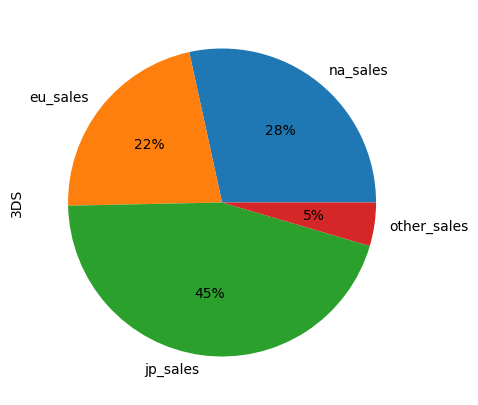

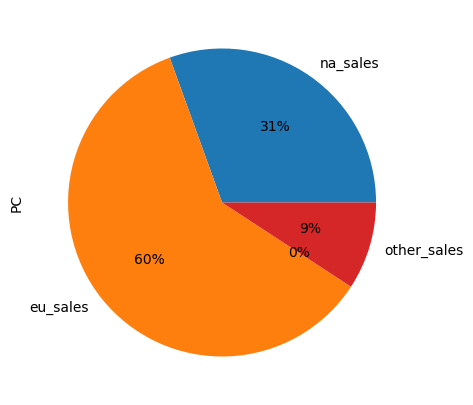

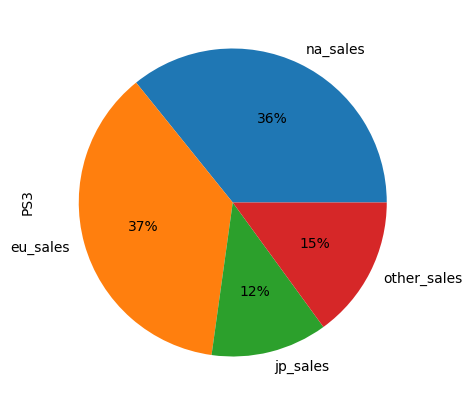

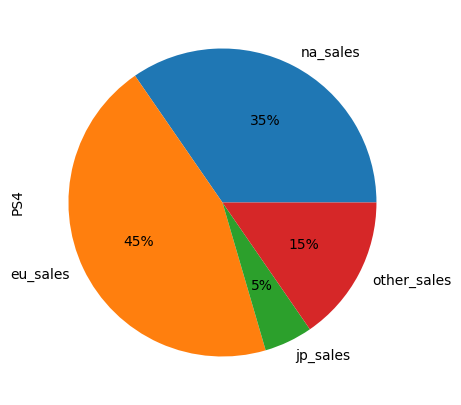

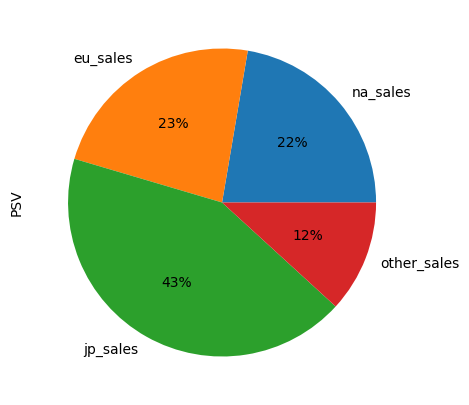

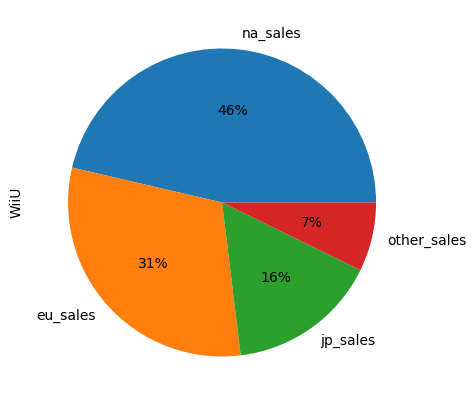

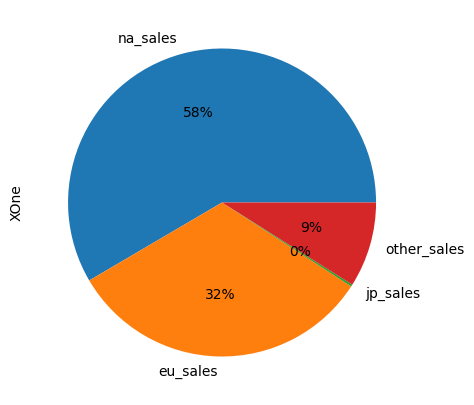

In [39]:
all_sales_pivot = all_sales_pivot.T
platforms = ['3DS','PC','PS3','PS4','PSV','WiiU','XOne']
for i in platforms :
    all_sales_pivot[i].plot(kind='pie', autopct='%1.0f%%' ,  figsize=(5, 5))
    plt.show()

**Выводы:**
- 3DS - 45% всех продаж приходится на Японию. 28% - на Северную Америку, 22% - на Европу
- PS - 60% всех продаж приходится на Европу. 31% - на Северную Америку, Япония в PS не играет :)
- PS3 - Почти равные доли по 36-37% у Европы и Севериной Америки. У Японии только 12%
- PS4 - 45% всех продаж приходится на Европу. 35% - на Северную Америку. У Японии только 5%
- PSV - 43% всех продаж приходится на Японию.  23% - на Европу, 22% - на Северную Америку.
- WiiU - 46% всех продаж приходится на Северную Америку. 31% - у Европы и 16% у Японии.
- XOne - 58% продаж у Северной Америки, 32% у Европы. Япония в XOne не играет.

**Итоги:** 
- Америка занимает бОльшую долю продаж игр на таких платформах как:  WiiU, XOne и PS3
- Европа занимает бОльшую долю продаж игр на таких платформах как:  PS, PS3 и PS4. 
- Япония занимает бОльшую долю продаж игр на таких платформах как:  PSV и 3DS.

<div class="alert alert-info">Определяем для пользователя каждого региона (NA, EU, JP) <b>самые популярные жанры игр (топ-5)</b> </div>

<AxesSubplot:>

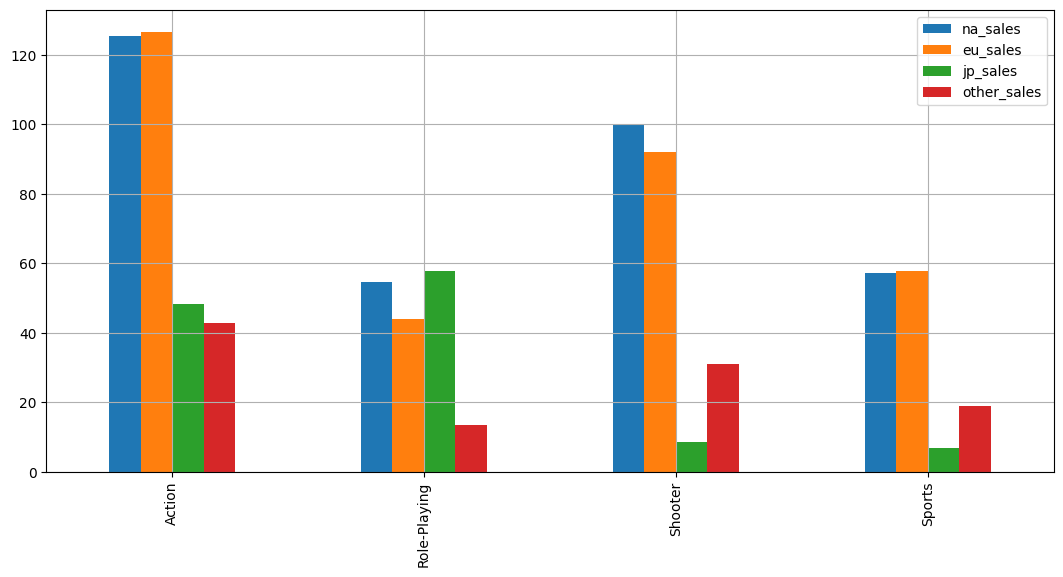

In [47]:
county_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data_top.query('genre == ["Action", "Shooter", "Role-Playing", "Sports"]').groupby('genre').sum().plot(
    kind='bar',
    y=county_sales,
    xlabel='',
    ylabel='',
    legend=True,
    grid=True,
    figsize=(13, 6)
)

**Выводы:**
- Action - самый популярный жанр в Америке и Европе. В Японии тоже популярен, но не так как Role-Playing.
- Shooter  - в Японии покупают мало, в то время как в Америке и Европе это также популярный жанр.
- Role-Playing - самый популярный жанр в Японии и самый НЕпопулярный в Америке и Европе.
- Sports - в Японии также непопулян как и Shooter. в Америке и Европе не очень популярен.

**Итог:**
 - **Предпочтения у Америки, Европы и других страх - схожи(в топе Action и Shooter). У Японии - прямо противоположные(Role-Playing).**

<div class="alert alert-info"><b>Влияние рейтинга ESRB на продажи в отдельных регионах</b> </div>

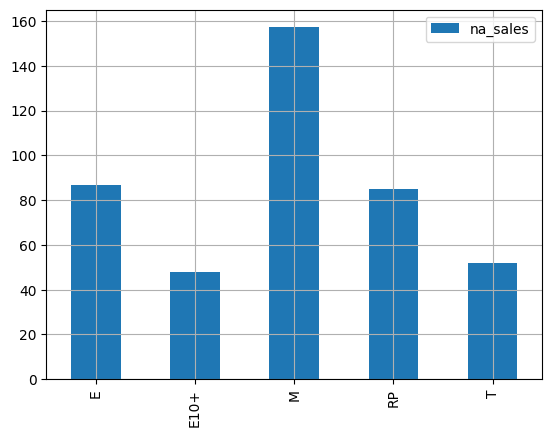

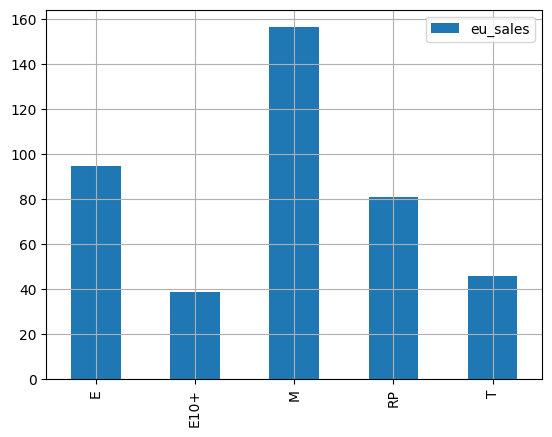

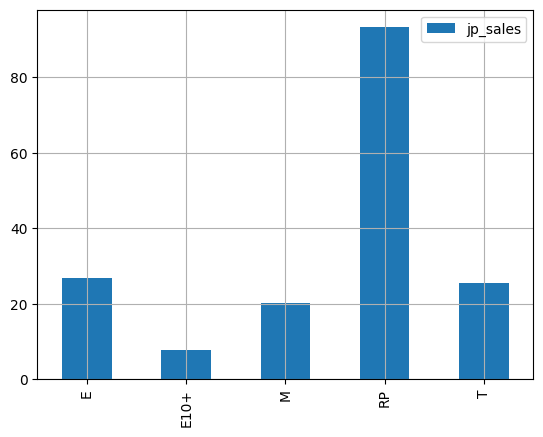

In [42]:
county_sales = ['na_sales', 'eu_sales', 'jp_sales']
for i in county_sales :
    data_top.groupby('rating')[i].sum().plot(
        kind='bar',
        xlabel='',
        ylabel='',
        label=i, 
        legend=True,
        grid=True,
    )
    plt.show()

**Вывод:** 
- в Америке и Европе самые высокие продажи игр с рейтингом М(подходит для лиц в возрасте 17 лет и старше). После, идет рейтинг Е(подходящий для всех возрастов) и последними по продажам идут рейтинги Е10+(для лиц в возрасте 10 лет и старше) и Т(подходящий для лиц в возрасте 13 лет и старше)
- По графику видим, что в Японии рейтинги Е(подходящий для всех возрастов) и Т(подходящий для лиц в возрасте 13 лет и старше) самые продаваемые, НО огромное количество игр без рейтинга. Вероятно в Японии есть свой личный рейтинг для игр. 

## Проверка гипотез

<div class="alert alert-info"> Проверяем гипотезу : <b> "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". </b>
    
<b>Нулевая гипотеза H₀</b> - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    
<b>Альтернативная гипотеза H₁</b>  - Средние пользовательские рейтинги платформ Xbox One отличаются от рейтинга платформы PC.
   </div>

In [43]:
data_for_hypotheses = data_from_2012.dropna(subset=['user_score'])

xbox_one_user_score = data_for_hypotheses[data_for_hypotheses['platform']=='XOne']['user_score']
pc_user_score = data_for_hypotheses[data_for_hypotheses['platform']=='PC']['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    xbox_one_user_score, 
    pc_user_score, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


- Полученное значение p-value говорит о том, что вероятность получить такую или бОльшую разницу почти 55%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами Xbox One и PC.

- Не получилось отвергнуть нулевую гипотезу H₀ о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<div class="alert alert-info"> Проверяем гипотезу : <b> "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.". </b>
    
<b>Нулевая гипотеза H₀</b> - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
    
<b>Альтернативная гипотеза H₁</b>  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
   </div>

In [44]:
action_user_score = data_for_hypotheses[data_for_hypotheses['genre']=='Action']['user_score']
sports_user_score = data_for_hypotheses[data_for_hypotheses['genre']=='Sports']['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    action_user_score, 
    sports_user_score, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


- Полученное значение p-value говорит о том, что вероятность получить такую или бОльшую разницу меньше 5%. Это слишком маленькая вероятность, которая дает возможность сделать вывод о значимом различии между пользовательскими рейтингами жанров Action и Sport.
- Отвергли нулевую гепотзу H₀ о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Оставили альтернативную H₁ о том,что средние пользовательские рейтинги жанров Action и Sports различаются.


## Вывод

**1. Общяя информация о датасете:**
- 16,7 тыс. строк.
- Полных дубликатов нет.
- Есть пропуски данных в столбцах : Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Подробнее рассмотрим ниже.
- Необходимо заменить типы данных в столбцах: year_of_release и user_score.
- Необходимо привести названия столбцов к нижнему регистру.
- Минимальные и максимальные значения в столбцах Year_of_Release, Critic_Score адекватные. Выбросов нет.
- Видим огромныю разницу между медианами и максимальными вначениями в столбцах na_sales, eu_sales, jp_sales и other_sales.

**2. Подготовка данных для анализа:**
- Заменили названия столбцов (привели к нижнему регистру)

- Преобразование типов данных:

   - year_of_release - заменилт тип float64 на Int64 , так как для datetime64, нет достаточной информации.
   - user_score - заменили тип object на float64, так как это числовой рейтинг.
   - остальные типы столбцов соответствуют наполнению
   
- Обработка пропусков:

   - name и genre - Пустые строки удалены их в связи с отсутствием полезной информации. 
   - year_of_release, critic_score и user_score - Пропуски не будем ничем заполнять, так как корректно заполнить их нечем. Заполнять медианой или средним - будет не верно. Удалять строки, так же не будем, что бы не терять данные.
   - rating - пропуски заменены на "PR" - это символ который используется в рекламных материалах для игр, которым еще не присвоен окончательный рейтинг ESRB.
   
- Посчитали суммарные продаж во всех регионах и добавили их в столбец all_sales

**3. Исследовательский анализ данных:**
- **Сроки жизни популярных платформ:**

   - PS2 - 2002 - 2011 - 9лет
   - DS - 2004 - 2013 - 9 лет
   - PS3 - 2006 - 2016 - 10 лет
   - Wii - 2006 - 2016 - 10 лет
   - X360 - 2005 - 2016 - 11 лет
*В среднем срок жизни популярных платформ судя по данным - около 10 лет.*


- **Какие платформы лидируют по продажам, растут или падают?**

   - Платформы DS, PSP и Wii ушли или практически ушли с рынка.
   - Платформа , X360 - имеет небольшую, но значительную долю рынка (13 игр и продажи на сумму от 1,5 за 2016ый год), но продажи сильно падают.
   - Платформы 3DS, PS3, PS, PSV, WiiU - имеют большую долю рынка (от 14 до 85 игр и продажи на сумму от 3,6 до 15млн за 2016ый год), но продажи падают.
   - Платформы PS4(164 игр за 2016 и почти 70млн) и XOne(87 игр за 2016 и 26млн) имеют огромную долю рынка и набинают обороты.


- **Зависимость продаж ирг на платформах от оценок критиков и пользователей.
   - Есть достаточно высокая линейная зависимость продаж от оценки критиков.(корреляция 0,3 - 0,4)
   - Между оценкой пользователей и суммой продаж игры - линейной зависимости не найдено.(корреляция около 0)


- **ТОП 4 жанра игр по сумме продаж:**

   - Action - продажи на сумму: 343 млн. Количество игр: 830
   - Shooter - продажи на сумму: 232 млн. Количество игр: 186
   - Role-Playing - продажи на сумму: 170 млн. Количество игр: 323
   - Sports - продажи на сумму: 141 млн. Количество игр: 205
   - Жанры Adventure и Misc не высокие по суммам продаж, но их много по количеству. Это говорит о том, что игр выпускается много, но они недорогие.

**4. Портрет пользователя каждого региона:**

- **Самые популярные платформы (топ-5):**

   - в Америке топ платформ: PS4, PS3, XOne, 3DS и WiiU  
   - В Европе похожая картина: PS4, PS3, XOne, 3DS и PS
   - В Японии другая картина : 3DS, PS3, PSV, PS4 и WiiU  
   - В остальных странах тенденция такая же как и Америке и Европе.
    
    
- **Сколько млн. тратит каждый регион (NA, EU, JP) на игры на определенных платформах**

   - 3DS - 45% всех продаж приходится на Японию. 28% - на Северную Америку, 22% - на Европу
   - PS - 60% всех продаж приходится на Европу. 31% - на Северную Америку, Япония в PS не играет :)
   - PS3 - Почти равные доли по 36-37% у Европы и Севериной Америки. У Японии только 12%
   - PS4 - 45% всех продаж приходится на Европу. 35% - на Северную Америку. У Японии только 5%
   - PSV - 43% всех продаж приходится на Японию.  23% - на Европу, 22% - на Северную Америку.
   - WiiU - 46% всех продаж приходится на Северную Америку. 31% - у Европы и 16% у Японии.
   - XOne - 58% продаж у Северной Америки, 32% у Европы. Япония в XOne не играет.

    *Итоги:*
    
   - Америка занимает бОльшую долю продаж игр на таких платформах как:  WiiU, XOne и PS3
   - Европа занимает бОльшую долю продаж игр на таких платформах как:  PS, PS3 и PS4. 
   - Япония занимает бОльшую долю продаж игр на таких платформах как:  PSV и 3DS.


- **Самые популярные жанры игр (топ-5):**

   - Action - самый популярный жанр в Америке и Европе. В Японии тоже популярен, но не так как Role-Playing.
   - Shooter.  - в Японии покупают мало, в то время как в Америке и Европе это также популярный жанр.
   - Role-Playing - самый популярный жанр в Японии и самый НЕпопулярный в Америке и Европе.
   - Sports - в Японии также непопулян как и Shooter. в Америке и Европе не очень популярен.

    *Итоги:*
    
    - Предпочтения у Америки, Европы и других страх - схожи(в топе Action и Shooter). У Японии - прямо противоположные(Role-Playing).
  
  
- **Влияние рейтинга ESRB на продажи в отдельных регионах:**
   - в Америке и Европе самые высокие продажи игр с рейтингом М(подходит для лиц в возрасте 17 лет и старше). После, идет рейтинг Е(подходящий для всех возрастов) и последними по продажам идут рейтинги Е10+(для лиц в возрасте 10 лет и старше) и Т(подходящий для лиц в возрасте 13 лет и старше)
   - По графику видим, что в Японии рейтинги Е(подходящий для всех возрастов) и Т(подходящий для лиц в возрасте 13 лет и старше) самые продаваемые, НО огромное количество игр без рейтинга. Вероятно в Японии есть свой личный рейтинг для игр. 

**5. Проверка гипотез:**
- Гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не удалось отвергнуть.
- Гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные." - оставили, так как отвергли гипотезу о том что "Средние пользовательские рейтинги жанров Action и Sports одинаковые."




**Итоги анализа. Рекомендации для бизнеса:**


**Для Северной Америки:**
- Популярные платформы : PS4, PS3, XOne, 3DS и WiiU (Но помним, что обороты набирает именно PS4 и XOne)
- Популярные жанры игр: Action и Shooter.


**Для Европы:**
- Популярные платформы : PS4, PS3, XOne, 3DS и PS (Но помним, что обороты набирает именно PS4 и XOne)
- Популярные жанры игр: Action и Shooter.


**Для Японии:**
- Популярные платформы : 3DS, PS3, PSV, PS4 и WiiU (Но помним, что обороты набирает именно PS4)
- Популярные жанры игр: Role-Playing.

**Так же стоит обращать внимание на оценки критиков, потому что они влияют на количество и сумму продаж**